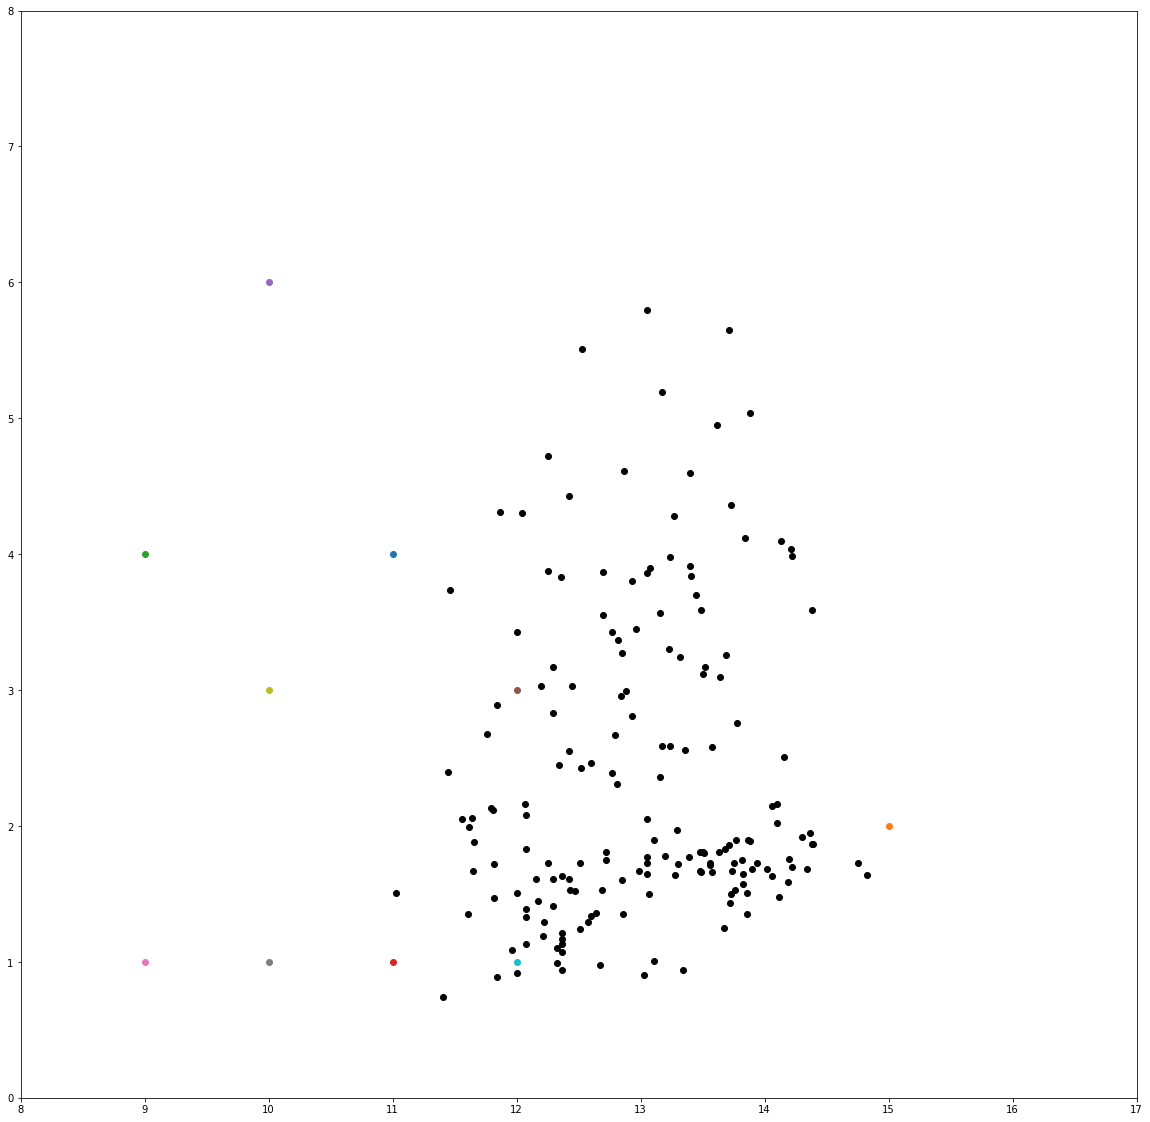

In [20]:
# Got inspirated by http://benalexkeen.com/k-means-clustering-in-python/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data')
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df=df.drop(['class identifier'], axis=1)
df


np.random.seed(200)
k = 10
# centroids[i] = [x, y]
# I chose (9, 16) and (0.5, 7) beause of the limitation of Alcohol and Malic acid "domain"
centroids = {
    i+1: [np.random.randint(9, 16), np.random.randint(0.5, 7)]
    for i in range(k)
}

  
fig = plt.figure(figsize=(20, 20))
plt.scatter(df['Alcohol'], df['Malic acid'], color='k')#df['Ash'], df['Alcalinity of ash'],df['Magnesium'],df['Total phenols'],df['Flavanoids'],df['Nonflavanoid phenols'],
            #df['Proanthocyanins'],df['Color intensity'],df['Hue'],df['OD280/OD315 of diluted wines'],df['Proline'], color='k')
#colmap = {1: 'r', 2: 'g', 3: 'b'}
colmap = {1: 'tab:red', 2: 'tab:green', 3: 'tab:blue', 4:'tab:purple', 5:'tab:cyan', 6:'tab:olive', 7:'tab:orange', 8:'tab:pink', 9:'tab:brown', 10:'tab:gray'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(8,17)
plt.ylim(0,8)
plt.show()
 

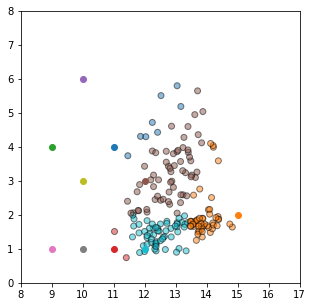

In [21]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Alcohol'] - centroids[i][0]) ** 2
                + (df['Malic acid'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
#print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Alcohol'], df['Malic acid'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(8,17)
plt.ylim(0,8)
plt.show()

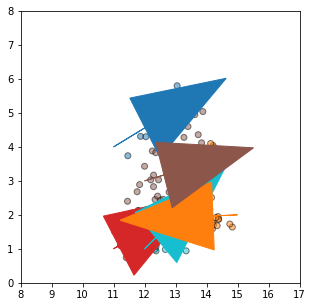

In [22]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['Alcohol'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Malic acid'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['Alcohol'], df['Malic acid'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(8,17)
plt.ylim(0,8)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

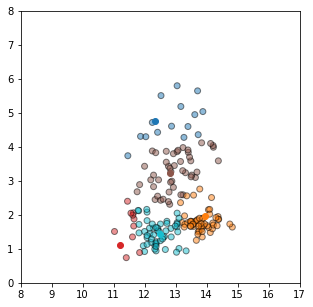

In [23]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Alcohol'], df['Malic acid'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(8,17)
plt.ylim(0,8)
plt.show()

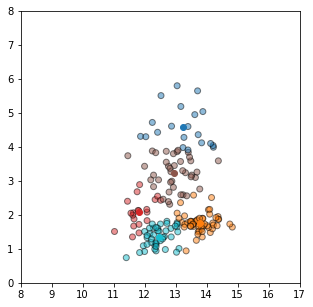

In [24]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Alcohol'], df['Malic acid'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(8,17)
plt.ylim(0,8)
plt.show()